---

### Trabalho Final 

### Softwares para uso em Ciência de Dados III

### Aluna: Camila Marques de Oliveira 

### Matrícula: 1931133126

---

# **Análise do comportamento das empresas no primeiro ano do primeiro mandato da ex-presidente Dilma (2011) e no ano do impeachment (2016)** 

Pontos que serão verificados: 

* Analisar empresas que abriram em 2011;
* Analisar empresas que abriram em 2011 e que ainda estão ativas; 
* Analisar empresas que fecharam em 2011; 
* Verificar a relação destas empresas - que estão ativas/ que abriram/ que fecharam - por região; 
* Relação destas empresas por atividade; 
* Verificar o porte destas empresas (Micro Empresa, Empresa de Pequeno Porte, demais, não informado); 
* Verificar o capital social destas empresas; 
* Fazer esta mesma análise para o ano de 2016;
* Analisar as empresas que abriram em 2011 e fecharam em 2016. 


# **Contextualização do problema**: 

#### Entre 2003 e 2011, a economia brasileira cresceu de forma acelerada, favorecida pela alta das commodities que o Brasil exporta como, por exemplo, petróleo, minério de ferro e soja. Porém, entre os anos de 2010 e 2012, essas exportações sofreram uma queda, pois as economias de outros países estava sofrendo um processo de desaceleração, causado pela crise econômica de 2008.


#### Além disso, vale mencionar que o primeiro mandato do governo Dilma foi marcado pela desaceleração econômica, e um dos fatores causadores desta desaceleração é a crise econômica mundial de 2008. Ainda, no início do mandato houve uma redução das políticas fiscais em favor da expansão das políticas monetárias, porém, já em 2012, as políticas fiscais são retomadas e em 2015 é adotado um dos maiores reajustes fiscais. Assim sendo, o primeiro mandato foi marcado pela desaceleração econômica e o primeiro ano do segundo mandato por uma recessão, consequente das políticas fiscais (DWECK; TEIXEIRA, 2017). 

#### Além de todos esses fatores mencionados, em 2016, ocorre o impeachment da ex-presidente Dilma. Crises políticas podem enaltecer crises econômicas, gerar instabilidade e perda de confiança no empresário, além de gerar redução do consumo. De acordo com Andréa Oliveira Gozetto, toda esta instabilidade no âmbito político afetaria de forma negativa as pequenas, médias e grandes empresas, mas as que sentiriam mais os efeitos negativos, seriam as pequenas empresas (GLOBO, 2016).

#### Assim sendo, o objetivo desta análise é investigar se o impeachment pode ter gerado um grande impacto no fechamento das empresas, se comparado com o ano de 2011 - primeiro ano do primeiro mandato da ex-presidente Dilma. 





# Análise Exploratória dos Dados do CNPJ

A Receita Federal do Brasil disponibiliza em seu site a base do CNPJ nacional periódicamente. Assim, faremos uma breve análise exploratória inicial sobre os dados, visando obter alguns *insights* sobre os dados, sua natureza e características

In [ ]:
# Conectando o google colab ao meu drive:

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importação das bibliotecas que serão utilizadas nesta análise: 

import sqlite3 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1 - Carregando os *datasets*:

In [ ]:
# Nesta análise, utilizaremos a amostra de 5% da base completa de CNPJ's.

conexao = sqlite3.connect('/content/drive/My Drive/TRABALHO SOFTW. 3/amostra05pc.sqlite')

# Carrega os dados do CNPJ

df_CNPJ = pd.read_sql_query("SELECT * FROM cnpj_dados_cadastrais_pj", conexao)

In [ ]:
# Verificando o tamanho do dataset:

print(df_CNPJ.shape)

(222336, 40)


In [ ]:
df_desc_cnae = pd.read_sql_query("SELECT cod_secao, nm_secao, cod_cnae FROM tab_cnae", conexao)
df_desc_cnae.head()

,cod_secao,nm_secao,cod_cnae
0,A,AGRICULTURA PECUÁRIA PRODUÇÃO FLORESTAL PESCA ...,0111301
1,A,AGRICULTURA PECUÁRIA PRODUÇÃO FLORESTAL PESCA ...,0111302
2,A,AGRICULTURA PECUÁRIA PRODUÇÃO FLORESTAL PESCA ...,0111303
3,A,AGRICULTURA PECUÁRIA PRODUÇÃO FLORESTAL PESCA ...,0111399
4,A,AGRICULTURA PECUÁRIA PRODUÇÃO FLORESTAL PESCA ...,0112101


In [ ]:
df_uf_regiao = pd.read_csv('/content/drive/My Drive/TRABALHO SOFTW. 3/uf_regiao.csv')
df_uf_regiao.head()

,uf,regiao
0,AM,Norte
1,RR,Norte
2,AP,Norte
3,PA,Norte
4,TO,Norte


## 2 - Funções Básicas para Análise

In [ ]:
def tabela_categoricas(df,col,name_col):
    df_1 = pd.DataFrame(df[col].value_counts()).reset_index()
    df_1.columns = [name_col,'Qtd empresas']
    df_1['%Total'] = (df_1['Qtd empresas']/len(df))*100
    return df_1

In [ ]:
def distribuicaoNumericas(df,col,nameCol):
    med = pd.DataFrame(columns=[nameCol], index=['Media', 'Mediana', 'Minimo','Maximo'])
    med.loc['Media'][nameCol] = float(df[col].mean())
    med.loc['Mediana'][nameCol] = float(df[col].median())
    med.loc['Minimo'][nameCol] = float(df[col].min())
    med.loc['Maximo'][nameCol] = float(df[col].max())
    return med

## 3 - Análises Iniciais

### 3.1 - Limpeza dos Dados

Nesta análise, iremos utilizar somente os dados das empressa que têm como situação cadastral Ativa e Baixada. 

In [ ]:
# Situação cadastral:
# 01 - NULA
# 02 - ATIVA
# 03 - SUSPENSA
# 04 - INAPTA
# 08 - BAIXADA

df_cnpjs = df_CNPJ.copy()

df_cnpjs = df_cnpjs[(df_cnpjs["situacao_cadastral"].isin(["08","02"]))]
print(df_cnpjs.shape)
df_cnpjs.head()

(203791, 40)


,tipo_de_registro,indicador,tipo_atualizacao,cnpj,identificador_matriz_filial,razao_social,nome_fantasia,situacao_cadastral,data_situacao_cadastral,motivo_situacao_cadastral,nm_cidade_exterior,cod_pais,nm_pais,codigo_natureza_juridica,data_inicio_atividade,cnae_fiscal,descricao_tipo_logradouro,logradouro,numero,complemento,bairro,cep,uf,codigo_municipio,municipio,ddd_telefone_1,ddd_telefone_2,ddd_fax,correio_eletronico,qualificacao_responsavel,capital_social_empresa,porte_empresa,opcao_pelo_simples,data_opcao_pelo_simples,data_exclusao_simples,opcao_pelo_mei,situacao_especial,data_situacao_especial,filler,fim_registro
0,1,F,,00000000002992,2,BANCO DO BRASIL SA,PELOTAS-EST.UNIF.,02,2005-11-03,00,,,,2038,1966-08-01,6421200,RUA,LOBO DA COSTA,1315,,CENTRO,96010150,RS,8791,PELOTAS,,,,,10,0.0,05,0,None,None,,,None,,F
1,1,F,,00000000045020,2,BANCO DO BRASIL SA,BUENOS AIRES ARGENTINA,02,2005-11-03,00,,,,2038,1966-08-01,6421200,RUA,SARMIENTO,487,,,,EX,9707,EXTERIOR,,,,,10,0.0,05,0,None,None,,,None,,F
2,1,F,,00000000055506,2,BANCO DO BRASIL SA,ALENQUER PA EST UNIF,02,2005-11-03,00,,,,2038,1966-08-01,6422100,TRAVESSA,COLOMBIANO MARVAO,312,,PLANALTO,68200000,PA,0407,ALENQUER,93 35261204,93 35261207,93 35261394,age0555@bb.com.br,10,0.0,05,0,None,None,,,None,,F
3,1,F,,00000000066702,2,BANCO DO BRASIL SA,,02,2005-11-03,00,,,,2038,1973-09-17,6422100,PRACA,MANOEL LOUREIRO,163,,CENTRO,78470000,MT,9153,ROSARIO OESTE,,,,,10,0.0,05,0,None,None,,,None,,F
4,1,F,,00000000072850,2,BANCO DO BRASIL SA,NOVA ANDRADINA (MS),02,2005-11-03,00,,,,2038,1971-03-25,6422100,AVENIDA,ANTONIO JOAQUIM DE MOURA ANDRADE,1400,,CENTRO,79750000,MS,9123,NOVA ANDRADINA,67 34411820,67 34411972,67 34411790,age0728@bb.com.br,10,0.0,05,0,None,None,,,None,,F


In [ ]:
# Criação da coluna para descrição do porte da empresa e da situação cadastral:

df_cnpjs['porte_empresa_descr'] = df_cnpjs['porte_empresa'].replace(['00','01','03','05'],['NAO INFORMADO','MICRO EMPRESA','EMPRESA DE PEQUENO PORTE','DEMAIS'])

df_cnpjs['situacao_atividade']= df_cnpjs['situacao_cadastral'].replace(['08','02'],['INATIVA','ATIVA'])

df_cnpjs.head()

,tipo_de_registro,indicador,tipo_atualizacao,cnpj,identificador_matriz_filial,razao_social,nome_fantasia,situacao_cadastral,data_situacao_cadastral,motivo_situacao_cadastral,nm_cidade_exterior,cod_pais,nm_pais,codigo_natureza_juridica,data_inicio_atividade,cnae_fiscal,descricao_tipo_logradouro,logradouro,numero,complemento,bairro,cep,uf,codigo_municipio,municipio,ddd_telefone_1,ddd_telefone_2,ddd_fax,correio_eletronico,qualificacao_responsavel,capital_social_empresa,porte_empresa,opcao_pelo_simples,data_opcao_pelo_simples,data_exclusao_simples,opcao_pelo_mei,situacao_especial,data_situacao_especial,filler,fim_registro,porte_empresa_descr,situacao_atividade
0,1,F,,00000000002992,2,BANCO DO BRASIL SA,PELOTAS-EST.UNIF.,02,2005-11-03,00,,,,2038,1966-08-01,6421200,RUA,LOBO DA COSTA,1315,,CENTRO,96010150,RS,8791,PELOTAS,,,,,10,0.0,05,0,None,None,,,None,,F,DEMAIS,ATIVA
1,1,F,,00000000045020,2,BANCO DO BRASIL SA,BUENOS AIRES ARGENTINA,02,2005-11-03,00,,,,2038,1966-08-01,6421200,RUA,SARMIENTO,487,,,,EX,9707,EXTERIOR,,,,,10,0.0,05,0,None,None,,,None,,F,DEMAIS,ATIVA
2,1,F,,00000000055506,2,BANCO DO BRASIL SA,ALENQUER PA EST UNIF,02,2005-11-03,00,,,,2038,1966-08-01,6422100,TRAVESSA,COLOMBIANO MARVAO,312,,PLANALTO,68200000,PA,0407,ALENQUER,93 35261204,93 35261207,93 35261394,age0555@bb.com.br,10,0.0,05,0,None,None,,,None,,F,DEMAIS,ATIVA
3,1,F,,00000000066702,2,BANCO DO BRASIL SA,,02,2005-11-03,00,,,,2038,1973-09-17,6422100,PRACA,MANOEL LOUREIRO,163,,CENTRO,78470000,MT,9153,ROSARIO OESTE,,,,,10,0.0,05,0,None,None,,,None,,F,DEMAIS,ATIVA
4,1,F,,00000000072850,2,BANCO DO BRASIL SA,NOVA ANDRADINA (MS),02,2005-11-03,00,,,,2038,1971-03-25,6422100,AVENIDA,ANTONIO JOAQUIM DE MOURA ANDRADE,1400,,CENTRO,79750000,MS,9123,NOVA ANDRADINA,67 34411820,67 34411972,67 34411790,age0728@bb.com.br,10,0.0,05,0,None,None,,,None,,F,DEMAIS,ATIVA


In [ ]:
df_cnpjs['cnae_fiscal']


0         6421200
1         6421200
2         6422100
3         6422100
4         6422100
           ...   
222331    4753900
222332    8888888
222333    8888888
222334    8888888
222335    1011205
Name: cnae_fiscal, Length: 203791, dtype: object

In [ ]:
# Join para incluir descrição do CNAE:

df_cnpjs = pd.merge(df_cnpjs, df_desc_cnae,how='left', left_on=['cnae_fiscal'], right_on=['cod_cnae'])
df_cnpjs = pd.merge(df_cnpjs, df_uf_regiao,how='left', on=['uf'])
df_cnpjs.head()

,tipo_de_registro,indicador,tipo_atualizacao,cnpj,identificador_matriz_filial,razao_social,nome_fantasia,situacao_cadastral,data_situacao_cadastral,motivo_situacao_cadastral,nm_cidade_exterior,cod_pais,nm_pais,codigo_natureza_juridica,data_inicio_atividade,cnae_fiscal,descricao_tipo_logradouro,logradouro,numero,complemento,bairro,cep,uf,codigo_municipio,municipio,ddd_telefone_1,ddd_telefone_2,ddd_fax,correio_eletronico,qualificacao_responsavel,capital_social_empresa,porte_empresa,opcao_pelo_simples,data_opcao_pelo_simples,data_exclusao_simples,opcao_pelo_mei,situacao_especial,data_situacao_especial,filler,fim_registro,porte_empresa_descr,situacao_atividade,cod_secao,nm_secao,cod_cnae,regiao
0,1,F,,00000000002992,2,BANCO DO BRASIL SA,PELOTAS-EST.UNIF.,02,2005-11-03,00,,,,2038,1966-08-01,6421200,RUA,LOBO DA COSTA,1315,,CENTRO,96010150,RS,8791,PELOTAS,,,,,10,0.0,05,0,None,None,,,None,,F,DEMAIS,ATIVA,K,ATIVIDADES FINANCEIRAS DE SEGUROS E SERVIÇOS R...,6421200,Sul
1,1,F,,00000000045020,2,BANCO DO BRASIL SA,BUENOS AIRES ARGENTINA,02,2005-11-03,00,,,,2038,1966-08-01,6421200,RUA,SARMIENTO,487,,,,EX,9707,EXTERIOR,,,,,10,0.0,05,0,None,None,,,None,,F,DEMAIS,ATIVA,K,ATIVIDADES FINANCEIRAS DE SEGUROS E SERVIÇOS R...,6421200,NaN
2,1,F,,00000000055506,2,BANCO DO BRASIL SA,ALENQUER PA EST UNIF,02,2005-11-03,00,,,,2038,1966-08-01,6422100,TRAVESSA,COLOMBIANO MARVAO,312,,PLANALTO,68200000,PA,0407,ALENQUER,93 35261204,93 35261207,93 35261394,age0555@bb.com.br,10,0.0,05,0,None,None,,,None,,F,DEMAIS,ATIVA,K,ATIVIDADES FINANCEIRAS DE SEGUROS E SERVIÇOS R...,6422100,Norte
3,1,F,,00000000066702,2,BANCO DO BRASIL SA,,02,2005-11-03,00,,,,2038,1973-09-17,6422100,PRACA,MANOEL LOUREIRO,163,,CENTRO,78470000,MT,9153,ROSARIO OESTE,,,,,10,0.0,05,0,None,None,,,None,,F,DEMAIS,ATIVA,K,ATIVIDADES FINANCEIRAS DE SEGUROS E SERVIÇOS R...,6422100,Centro-Oeste
4,1,F,,00000000072850,2,BANCO DO BRASIL SA,NOVA ANDRADINA (MS),02,2005-11-03,00,,,,2038,1971-03-25,6422100,AVENIDA,ANTONIO JOAQUIM DE MOURA ANDRADE,1400,,CENTRO,79750000,MS,9123,NOVA ANDRADINA,67 34411820,67 34411972,67 34411790,age0728@bb.com.br,10,0.0,05,0,None,None,,,None,,F,DEMAIS,ATIVA,K,ATIVIDADES FINANCEIRAS DE SEGUROS E SERVIÇOS R...,6422100,Centro-Oeste


In [ ]:
# Verificando a quantidade de empresas ativas e inativas: 

tabela_categoricas(df_cnpjs,'situacao_atividade', 'Atividade')

,Atividade,Qtd empresas,%Total
0,ATIVA,105641,51.837912
1,INATIVA,98150,48.162088


In [ ]:
# Colocando as datas no formato de datetime:

df_cnpjs['data_inicio_atividade'] = pd.to_datetime(df_cnpjs['data_inicio_atividade'])
df_cnpjs['data_situacao_cadastral'] = pd.to_datetime(df_cnpjs['data_situacao_cadastral'])

print(df_cnpjs.dtypes)

tipo_de_registro                       object
indicador                              object
tipo_atualizacao                       object
cnpj                                   object
identificador_matriz_filial            object
razao_social                           object
nome_fantasia                          object
situacao_cadastral                     object
data_situacao_cadastral        datetime64[ns]
motivo_situacao_cadastral              object
nm_cidade_exterior                     object
cod_pais                               object
nm_pais                                object
codigo_natureza_juridica               object
data_inicio_atividade          datetime64[ns]
cnae_fiscal                            object
descricao_tipo_logradouro              object
logradouro                             object
numero                                 object
complemento                            object
bairro                                 object
cep                               

#### 3.1.1 - Análise Básica

In [ ]:
# Verificando a distribuição por categorias de atividade na base total de empresas que estão ativas: 

empresas_ativas = df_cnpjs[(df_cnpjs.situacao_cadastral) == '02']

tabela_categoricas(empresas_ativas,'nm_secao','SEÇÃO')


,SEÇÃO,Qtd empresas,%Total
0,COMÉRCIO REPARAÇÃO DE VEÍCULOS AUTOMOTORES E M...,33393,31.609886
1,OUTRAS ATIVIDADES DE SERVIÇOS,10729,10.156095
2,INDÚSTRIAS DE TRANSFORMAÇÃO,9170,8.680342
3,ALOJAMENTO E ALIMENTAÇÃO,8824,8.352818
4,CONSTRUÇÃO,7711,7.299249
5,ATIVIDADES ADMINISTRATIVAS E SERVIÇOS COMPLEME...,7064,6.686798
6,TRANSPORTE ARMAZENAGEM E CORREIO,5994,5.673933
7,ATIVIDADES PROFISSIONAIS CIENTÍFICAS E TÉCNICAS,5585,5.286773
8,AGRICULTURA PECUÁRIA PRODUÇÃO FLORESTAL PESCA ...,3513,3.325413
9,EDUCAÇÃO,3227,3.054685


In [ ]:
# Verifica a distribuição do tamanho das empresas na base total, apenas as que estão ativas:

tabela_categoricas(empresas_ativas,'porte_empresa_descr','Porte')

,Porte,Qtd empresas,%Total
0,MICRO EMPRESA,85011,80.471597
1,DEMAIS,15848,15.001751
2,EMPRESA DE PEQUENO PORTE,4532,4.290001
3,NAO INFORMADO,250,0.236651


Pode-se perceber que a meio parte das empresas que estão ativas são as do porte de Micro Empresa, sendo 80% das empresas ativas.

#### 3.1.2 - Capital Social das Empresas

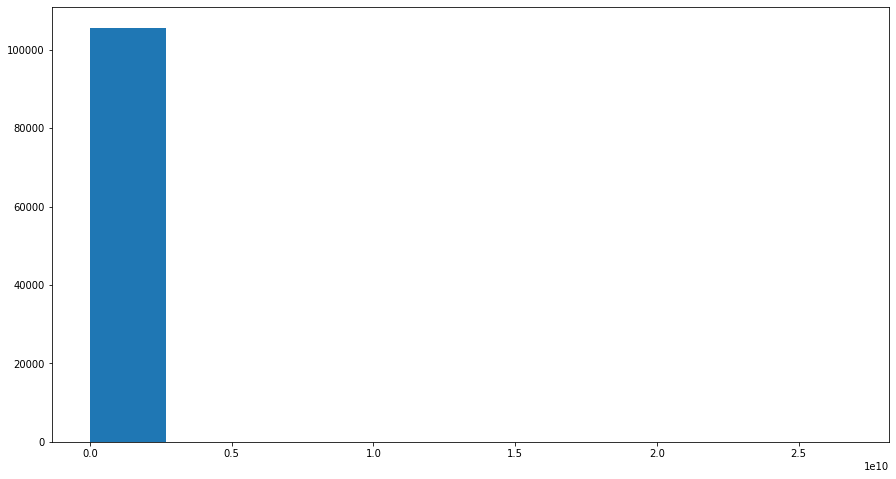

In [ ]:
plt.figure(figsize = (15,8))
empresas_ativas['capital_social_empresa'].hist(grid = False)

Pode ser que a distribuição esteja bastante concentrada no zero pelo fato de 80% das empresas ativas serem Micro Empresas. 

De acordo com o Sebrae, aqueles que são MEI (micro empreendedor individual), não precisam declarar capital social inicial, porque eles não podem ter sócios.

Fonte: https://m.sebrae.com.br/sites/PortalSebrae/ufs/ap/artigos/como-definir-o-capital-social-de-uma-empresa,328a3a3a410ef510VgnVCM1000004c00210aRCRD

In [ ]:
# Verificando a média, mediana, mínimo e máximo do capital social das empresas: 

distribuicaoNumericas(df_cnpjs,'capital_social_empresa','Capital Social - Empresas')

,Capital Social - Empresas
Media,534788
Mediana,100
Minimo,0
Maximo,2.91041e+10


In [ ]:
# Separo as empresas ativas das inativas

cnpjAtivos = df_cnpjs[df_cnpjs['situacao_cadastral'] == "02"].copy()
cnpjInativo = df_cnpjs[df_cnpjs['situacao_cadastral'] == "08"].copy()

In [ ]:
cnpjAtivos['idade'] = pd.to_datetime("2020-07-04") - cnpjAtivos['data_inicio_atividade']
print(cnpjAtivos.head())

  tipo_de_registro indicador tipo_atualizacao  ... cod_cnae        regiao      idade
0                1         F                   ...  6421200           Sul 19696 days
1                1         F                   ...  6421200           NaN 19696 days
2                1         F                   ...  6422100         Norte 19696 days
3                1         F                   ...  6422100  Centro-Oeste 17092 days
4                1         F                   ...  6422100  Centro-Oeste 17999 days

[5 rows x 47 columns]


In [ ]:
cnpjAtivos['idade'] = pd.to_numeric(cnpjAtivos['idade'].dt.days, downcast = 'integer') / 365
print(cnpjAtivos.head())

  tipo_de_registro indicador tipo_atualizacao  ... cod_cnae        regiao      idade
0                1         F                   ...  6421200           Sul  53.961644
1                1         F                   ...  6421200           NaN  53.961644
2                1         F                   ...  6422100         Norte  53.961644
3                1         F                   ...  6422100  Centro-Oeste  46.827397
4                1         F                   ...  6422100  Centro-Oeste  49.312329

[5 rows x 47 columns]


In [ ]:
# Verificando as medidas da idade das empresas ativas:

distribuicaoNumericas(cnpjAtivos, 'idade' , 'Idade das Empresas Ativas')

,Idade das Empresas Ativas
Media,8.08486
Mediana,4.90411
Minimo,0.00273973
Maximo,128.784


In [ ]:
# Verificando as medidas da idade das empresas que estão inativas: 

cnpjInativo['idade'] = cnpjInativo['data_situacao_cadastral'] - cnpjInativo['data_inicio_atividade']
cnpjInativo['idade'] = pd.to_numeric(cnpjInativo['idade'].dt.days, downcast = 'integer') / 365
distribuicaoNumericas(cnpjInativo, 'idade' , 'Idade das Empresas Inativas')

,Idade das Empresas Inativas
Media,8.98947
Mediana,5.12329
Minimo,-0.175342
Maximo,67.3096


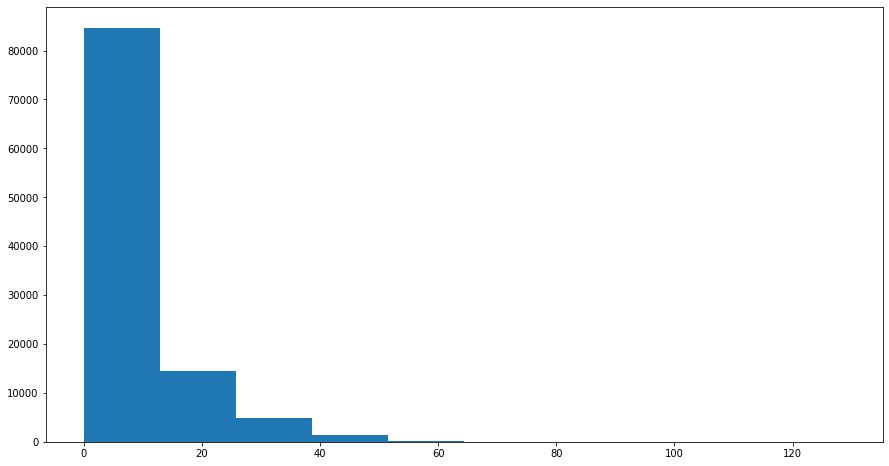

In [ ]:
plt.figure(figsize = (15,8))
cnpjAtivos['idade'].hist(grid = False, bins = 10)

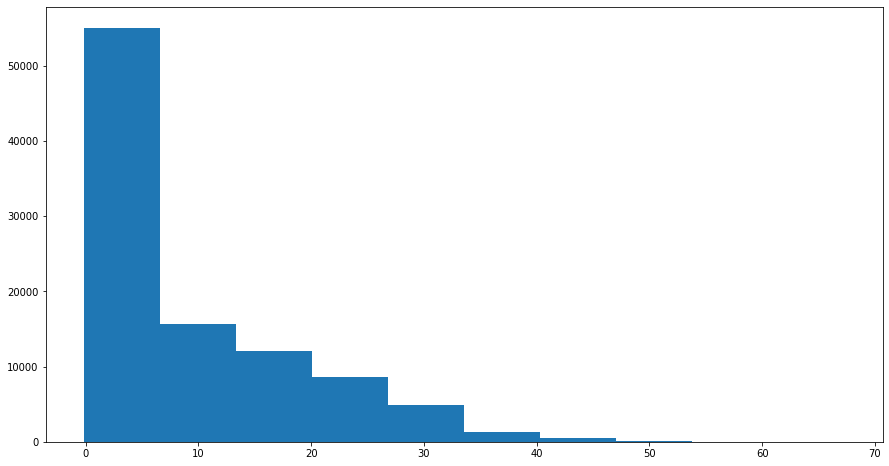

In [ ]:
plt.figure(figsize = (15,8))
cnpjInativo['idade'].hist(grid = False, bins = 10)

In [ ]:
cnpjAtivos['anoAbertura'] = cnpjAtivos['data_inicio_atividade'].dt.year
cnpjInativo['anoAbertura'] = cnpjInativo['data_inicio_atividade'].dt.year
cnpjInativo['anoFechamento'] = cnpjInativo['data_situacao_cadastral'].dt.year
df_cnpjs['anoAbertura'] = df_cnpjs['data_inicio_atividade'].dt.year

In [ ]:
abert_anos = pd.DataFrame(df_cnpjs['anoAbertura'].value_counts()).reset_index()
abert_anos = abert_anos[abert_anos['index'] > 1984]
abert_anos.columns = ['Ano Abertura' , 'Qtd. Empresas']
abert_anos['Ano Abertura'] = abert_anos['Ano Abertura'].apply(str)
abert_anos = abert_anos.sort_values(by='Ano Abertura')

Text(0.5, 0, 'Ano Abertura')

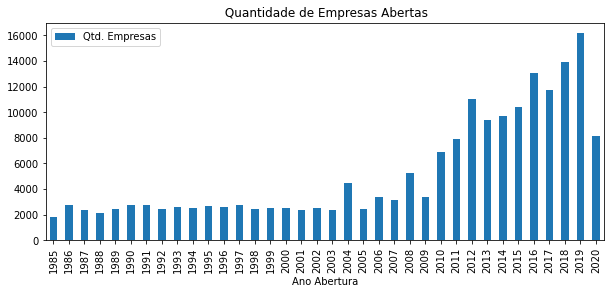

In [ ]:
ax = abert_anos.plot(kind = "bar", x = 'Ano Abertura',
                     title = " Quantidade de Empresas Abertas", figsize = (10,4))
ax.set_xlabel("Ano Abertura")

Por meio do gráfico é possível perceber que o ano em que mais empresas abriram foi o ano de 2019. Em 2011, aproximadamente 6.000 empresas abriram e em 2016, abriram aproximadamente 12.000 empresas. 

In [ ]:
df_cnpjs_ult_ano = df_cnpjs[(df_cnpjs['anoAbertura'] > 2018) & (df_cnpjs['uf'] == 'DF')]
tabela_categoricas(df_cnpjs_ult_ano, 'nm_secao', 'SEÇÃO')

,SEÇÃO,Qtd empresas,%Total
0,COMÉRCIO REPARAÇÃO DE VEÍCULOS AUTOMOTORES E M...,103,23.409091
1,ATIVIDADES PROFISSIONAIS CIENTÍFICAS E TÉCNICAS,55,12.500000
2,OUTRAS ATIVIDADES DE SERVIÇOS,49,11.136364
3,ALOJAMENTO E ALIMENTAÇÃO,42,9.545455
4,TRANSPORTE ARMAZENAGEM E CORREIO,37,8.409091
5,ATIVIDADES ADMINISTRATIVAS E SERVIÇOS COMPLEME...,29,6.590909
6,EDUCAÇÃO,27,6.136364
7,INDÚSTRIAS DE TRANSFORMAÇÃO,25,5.681818
8,CONSTRUÇÃO,24,5.454545
9,INFORMAÇÃO E COMUNICAÇÃO,20,4.545455


In [ ]:
fech_anos = pd.DataFrame(cnpjInativo['anoFechamento'].value_counts()).reset_index()
fech_anos = fech_anos[fech_anos['index'] > 1984]
fech_anos.columns = ['Ano Fechamento','Qtd Empresas']
fech_anos['Ano Fechamento'] = fech_anos['Ano Fechamento'].apply(str)
fech_anos = fech_anos.sort_values(by='Ano Fechamento')

Text(0.5, 0, 'Ano Fechamento')

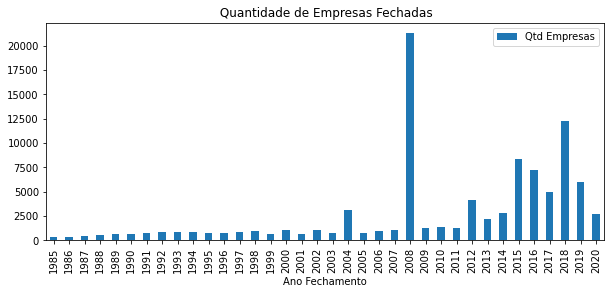

In [ ]:
ax = fech_anos.plot(kind = "bar", x = 'Ano Fechamento',
                    title = " Quantidade de Empresas Fechadas",figsize = (10,4))
ax.set_xlabel("Ano Fechamento")

Pelo gráfico, percebe-se que o ano que mais empresas fecharam foi o ano de 2008. 

In [ ]:
# Verificando a quantidade de empresas de cada uma das atividades que fechou em 2020:

df_cnpjs_ult_ano = cnpjInativo[(cnpjInativo['anoFechamento'] > 2019)]
tabela_categoricas(df_cnpjs_ult_ano, 'nm_secao', 'SEÇÃO')

,SEÇÃO,Qtd empresas,%Total
0,COMÉRCIO REPARAÇÃO DE VEÍCULOS AUTOMOTORES E M...,948,35.150167
1,ALOJAMENTO E ALIMENTAÇÃO,269,9.974045
2,INDÚSTRIAS DE TRANSFORMAÇÃO,228,8.453838
3,ATIVIDADES ADMINISTRATIVAS E SERVIÇOS COMPLEME...,192,7.119021
4,OUTRAS ATIVIDADES DE SERVIÇOS,179,6.637004
5,ATIVIDADES PROFISSIONAIS CIENTÍFICAS E TÉCNICAS,172,6.377456
6,TRANSPORTE ARMAZENAGEM E CORREIO,164,6.080831
7,CONSTRUÇÃO,153,5.672970
8,EDUCAÇÃO,115,4.263997
9,INFORMAÇÃO E COMUNICAÇÃO,80,2.966259


In [ ]:
uf_fechamento = pd.DataFrame(cnpjInativo['uf'].value_counts()).reset_index()
uf_fechamento.columns = ['Estados', 'Quantidade de Empresas Fechadas']
uf_fechamento = uf_fechamento.sort_values(by='Estados')

Text(0.5, 0, 'UF')

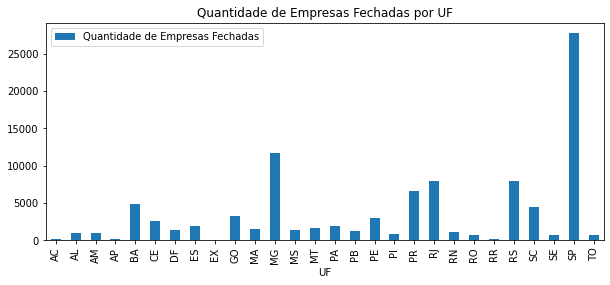

In [ ]:
ax = uf_fechamento.plot(kind = "bar", x = 'Estados',
                    title = "Quantidade de Empresas Fechadas por UF",figsize = (10,4))
ax.set_xlabel("UF")

In [ ]:
# Empresas fechadas em 2020 por UF:

uf_fechamento = pd.DataFrame(df_cnpjs_ult_ano['uf'].value_counts()).reset_index()
uf_fechamento.columns = ['Estados', 'Quantidade de Empresas Fechadas']
uf_fechamento = uf_fechamento.sort_values(by='Estados')

Text(0.5, 0, 'UF')

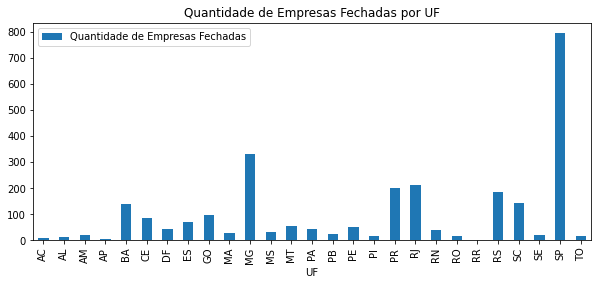

In [ ]:
ax = uf_fechamento.plot(kind = "bar", x = 'Estados',
                    title = "Quantidade de Empresas Fechadas por UF",figsize = (10,4))
ax.set_xlabel("UF")

Text(0.5, 1.0, 'Outliers do Capital Social das Empresas')

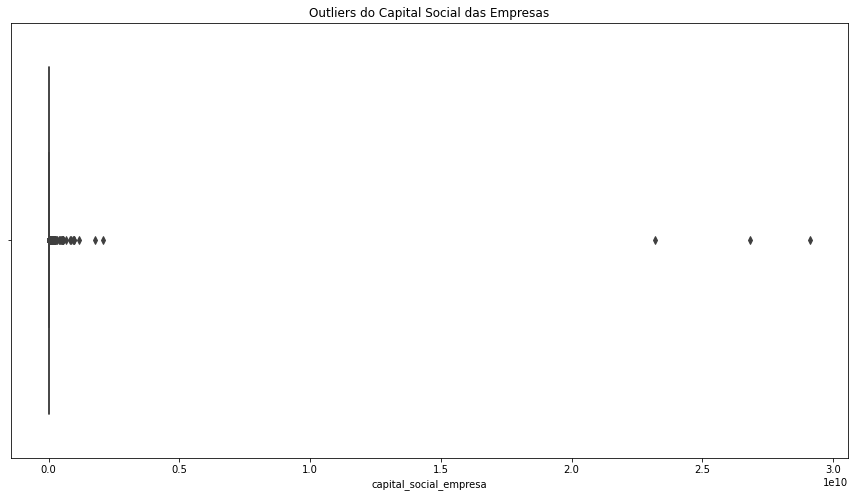

In [ ]:
# Verificando os outliers do capital social das empresas:

plt.figure(figsize = (15,8))
sns.boxplot(x=df_cnpjs['capital_social_empresa'])
plt.title('Outliers do Capital Social das Empresas')

Pode-se perceber que há três outliers na base, vamos dar mais uma olhada.

In [ ]:
# Buscando outliers:

df_cnpjs[df_cnpjs['capital_social_empresa'] > 10000000000]

,tipo_de_registro,indicador,tipo_atualizacao,cnpj,identificador_matriz_filial,razao_social,nome_fantasia,situacao_cadastral,data_situacao_cadastral,motivo_situacao_cadastral,nm_cidade_exterior,cod_pais,nm_pais,codigo_natureza_juridica,data_inicio_atividade,cnae_fiscal,descricao_tipo_logradouro,logradouro,numero,complemento,bairro,cep,uf,codigo_municipio,municipio,ddd_telefone_1,ddd_telefone_2,ddd_fax,correio_eletronico,qualificacao_responsavel,capital_social_empresa,porte_empresa,opcao_pelo_simples,data_opcao_pelo_simples,data_exclusao_simples,opcao_pelo_mei,situacao_especial,data_situacao_especial,filler,fim_registro,porte_empresa_descr,situacao_atividade,cod_secao,nm_secao,cod_cnae,regiao,anoAbertura
30765,1,F,,07005330000119,1,TERNIUM BRASIL LTDA.,,02,2004-09-24,00,,,,2062,2004-09-24,2421100,AVENIDA,JOAO XXIII,S/N,,SANTA CRUZ,23560352,RJ,6001,RIO DE JANEIRO,21 25074209,,,,05,2.683520e+10,05,0,None,None,N,,None,,F,DEMAIS,ATIVA,C,INDÚSTRIAS DE TRANSFORMAÇÃO,2421100,Sudeste,2004
47798,1,F,,10733916000104,1,ALCIONE DA SILVA PUCINELI,POUSADA METROPILITAN,08,2011-09-12,54,,,,2135,2009-03-17,5510801,RUA,JOAO HIGINO FIGUEIREDO,107,,CENTRO,45810000,BA,3807,PORTO SEGURO,73 32882500,73 32882448,,ZARACONTABIL@YAHOO.COM.BR,50,2.910414e+10,01,6,2009-03-17,2011-09-12,N,,None,,F,MICRO EMPRESA,INATIVA,I,ALOJAMENTO E ALIMENTAÇÃO,5510801,Nordeste,2009
52018,1,F,,11739133000109,1,FUN BOARD INDUSTRIA & COMERCIO DE CONFECCOES LTDA,FUN BOARD,08,2016-05-06,01,,,,2062,1986-12-22,1412601,RUA,ESTEVAO REMIGIO DE FREITAS,2123,,SANTA LUZIA,62930000,CE,1453,LIMOEIRO DO NORTE,85 32237087,,,,49,2.320034e+10,01,0,None,None,N,,None,,F,MICRO EMPRESA,INATIVA,C,INDÚSTRIAS DE TRANSFORMAÇÃO,1412601,Nordeste,1986


Tratam-se de três empresas, sendo que duas já estão inativas, apenas uma está ativa. 

### 3.1.3  Análise de 2011:




In [ ]:
# Criando a coluna de anoFechamento:

df_cnpjs['anoFechamento'] = df_cnpjs['data_situacao_cadastral'].dt.year

In [ ]:
# Verificando quantas empresas abriram no ano de 2011 (independente do ano de fechamento):

ano_2011 = df_cnpjs[(df_cnpjs['anoAbertura'] == 2011)]

ano_2011.groupby('anoAbertura').cnpj.count()


anoAbertura
2011    7915
Name: cnpj, dtype: int64

7.915 empresas foram abertas no ano de 2011.

In [ ]:
# Quantidade de empresas que abriram em 2011 por estado: 

empresa_uf = (
    ano_2011.groupby('uf').cnpj.count().sort_values(ascending = True).reset_index()
    .rename(columns={'uf':'Estado','cnpj':'Quantidade de Empresas'})
)

empresa_uf

,Estado,Quantidade de Empresas
0,RR,9
1,AP,22
2,AC,25
3,TO,43
4,RO,46
5,EX,48
6,SE,49
7,PI,69
8,AM,72
9,AL,91


Pode-se perceber que os cinco estados que mais abriram empresas são: Bahia, Rio Grande do Sul, Minas Gerais, Rio de Janeiro e São Paulo. 

Text(0, 0.5, 'Quantidade de Empresas')

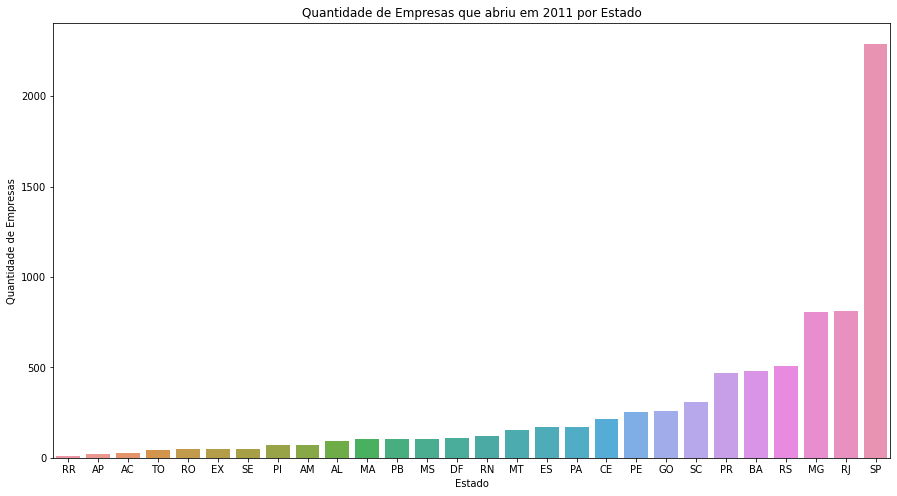

In [ ]:
# Visualização da quantidade de empresas que abriu em 2011 por estado: 

plt.figure(figsize = (15,8))
plt.title("Quantidade de Empresas que abriu em 2011 por Estado")
sns.barplot(x = empresa_uf.Estado, y = empresa_uf['Quantidade de Empresas'])
plt.ylabel('Quantidade de Empresas')

In [ ]:
# Verificando quantas empresas abriram em 2011 e ainda estão ativas:

ano_2011_ativas = df_cnpjs[(df_cnpjs['anoAbertura'] == 2011) & (df_cnpjs['situacao_atividade'] == 'ATIVA')]

ano_2011_ativas.groupby('anoAbertura').cnpj.count()

anoAbertura
2011    4202
Name: cnpj, dtype: int64

4.202 empresas que abriram em 2011 ainda estão ativas. 

In [ ]:
# Verificando o tipo de atividade das empresas que abriram em 2011:

tabela_categoricas(ano_2011, 'nm_secao', 'SEÇÃO')

,SEÇÃO,Qtd empresas,%Total
0,COMÉRCIO REPARAÇÃO DE VEÍCULOS AUTOMOTORES E M...,2914,36.816172
1,OUTRAS ATIVIDADES DE SERVIÇOS,882,11.143399
2,INDÚSTRIAS DE TRANSFORMAÇÃO,745,9.412508
3,ALOJAMENTO E ALIMENTAÇÃO,689,8.704991
4,CONSTRUÇÃO,552,6.974100
5,ATIVIDADES ADMINISTRATIVAS E SERVIÇOS COMPLEME...,454,5.735944
6,TRANSPORTE ARMAZENAGEM E CORREIO,356,4.497789
7,ATIVIDADES PROFISSIONAIS CIENTÍFICAS E TÉCNICAS,349,4.409349
8,AGRICULTURA PECUÁRIA PRODUÇÃO FLORESTAL PESCA ...,200,2.526848
9,EDUCAÇÃO,190,2.400505


A atividade com maior número de empresas é: COMÉRCIO REPARAÇÃO DE VEÍCULOS AUTOMOTORES E MOTOCICLETAS.

In [ ]:
# Verificando as atividades das empresas que abriram em 2011 e ainda estão ativas: 

tabela_categoricas(ano_2011_ativas, 'nm_secao', 'SEÇÃO')

,SEÇÃO,Qtd empresas,%Total
0,COMÉRCIO REPARAÇÃO DE VEÍCULOS AUTOMOTORES E M...,1413,33.626844
1,OUTRAS ATIVIDADES DE SERVIÇOS,490,11.661114
2,INDÚSTRIAS DE TRANSFORMAÇÃO,401,9.543075
3,ALOJAMENTO E ALIMENTAÇÃO,334,7.948596
4,CONSTRUÇÃO,288,6.853879
5,ATIVIDADES ADMINISTRATIVAS E SERVIÇOS COMPLEME...,252,5.997144
6,TRANSPORTE ARMAZENAGEM E CORREIO,191,4.545455
7,ATIVIDADES PROFISSIONAIS CIENTÍFICAS E TÉCNICAS,179,4.259876
8,AGRICULTURA PECUÁRIA PRODUÇÃO FLORESTAL PESCA ...,167,3.974298
9,EDUCAÇÃO,108,2.570205


Das empresas que abriram em 2011 e continuam ativas, a maior parte é das atividades de: COMÉRCIO REPARAÇÃO DE VEÍCULOS AUTOMOTORES E MOTOCICLETAS. 

In [ ]:
# Verificando a distribuição dessas empresas que abriram em 2011 por Região: 

empresa_regiao = pd.pivot_table(
    ano_2011,
    columns = 'regiao',
    index = 'nm_secao',
    values = 'cnpj',
    aggfunc = 'count'
)

empresa_regiao

regiao,Centro-Oeste,Nordeste,Norte,Sudeste,Sul
nm_secao,,,,,
ADMINISTRAÇÃO PÚBLICA DEFESA E SEGURIDADE SOCIAL,2.0,3.0,1.0,NaN,NaN
AGRICULTURA PECUÁRIA PRODUÇÃO FLORESTAL PESCA E AQUICULTURA,2.0,4.0,4.0,186.0,4.0
ALOJAMENTO E ALIMENTAÇÃO,55.0,148.0,28.0,351.0,107.0
ARTES CULTURA ESPORTE E RECREAÇÃO,5.0,11.0,NaN,54.0,16.0
ATIVIDADES ADMINISTRATIVAS E SERVIÇOS COMPLEMENTARES,33.0,73.0,24.0,240.0,83.0
ATIVIDADES FINANCEIRAS DE SEGUROS E SERVIÇOS RELACIONADOS,4.0,4.0,1.0,36.0,23.0
ATIVIDADES IMOBILIÁRIAS,2.0,11.0,2.0,36.0,11.0
ATIVIDADES PROFISSIONAIS CIENTÍFICAS E TÉCNICAS,35.0,41.0,13.0,207.0,51.0
COMÉRCIO REPARAÇÃO DE VEÍCULOS AUTOMOTORES E MOTOCICLETAS,239.0,667.0,176.0,1380.0,450.0


Nas cinco regiões, a atividade que mais abriu foi a de COMÉRCIO REPARAÇÃO DE VEÍCULOS AUTOMOTORES E MOTOCICLETAS, e depois a que mais abriu foi OUTRAS ATIVIDADES DE SERVIÇOS.

In [ ]:
# Verificando a distribuição das empresas que abriram em 2011 e continuam ativas por Região: 

empresa_regiao_ativa = pd.pivot_table(
    ano_2011_ativas,
    columns = 'regiao',
    index = 'nm_secao',
    values = 'cnpj',
    aggfunc = 'count'
)

empresa_regiao_ativa

regiao,Centro-Oeste,Nordeste,Norte,Sudeste,Sul
nm_secao,,,,,
ADMINISTRAÇÃO PÚBLICA DEFESA E SEGURIDADE SOCIAL,2.0,2.0,1.0,NaN,NaN
AGRICULTURA PECUÁRIA PRODUÇÃO FLORESTAL PESCA E AQUICULTURA,2.0,4.0,3.0,155.0,3.0
ALOJAMENTO E ALIMENTAÇÃO,28.0,85.0,12.0,155.0,54.0
ARTES CULTURA ESPORTE E RECREAÇÃO,4.0,3.0,NaN,32.0,11.0
ATIVIDADES ADMINISTRATIVAS E SERVIÇOS COMPLEMENTARES,19.0,39.0,12.0,132.0,49.0
ATIVIDADES FINANCEIRAS DE SEGUROS E SERVIÇOS RELACIONADOS,2.0,4.0,1.0,25.0,19.0
ATIVIDADES IMOBILIÁRIAS,NaN,8.0,2.0,26.0,10.0
ATIVIDADES PROFISSIONAIS CIENTÍFICAS E TÉCNICAS,17.0,23.0,10.0,100.0,27.0
COMÉRCIO REPARAÇÃO DE VEÍCULOS AUTOMOTORES E MOTOCICLETAS,118.0,333.0,96.0,637.0,227.0


As empresas que continuaram ativas de maior quantidade têm como atividade COMÉRCIO REPARAÇÃO DE VEÍCULOS AUTOMOTORES E MOTOCICLETAS, fato esperado pois é a atividade que tinha maior quantidade. A segunda atividade de maior quantidade é OUTRAS ATIVIDADES DE SERVIÇOS, com exceção da região Sul que teve como segunda atividade mais presente INDÚSTRIAS DE TRANSFORMAÇÃO. 

In [ ]:
# Verificando o porte das empresas que abriram em 2011: 

porte_2011 = pd.pivot_table(
    ano_2011, 
    index = 'porte_empresa_descr',
    values = 'cnpj',
    aggfunc = 'count'
).reset_index().rename(columns={'cnpj':'Quantidade','porte_empresa_descr':'Porte da Empresa'})

porte_2011.sort_values(by = 'Quantidade', ascending = True, ignore_index = True)

,Porte da Empresa,Quantidade
0,NAO INFORMADO,47
1,EMPRESA DE PEQUENO PORTE,264
2,DEMAIS,971
3,MICRO EMPRESA,6633


O porte de empresas que mais abriu em 2011 foi de Micro Empresa.

In [ ]:
# Verificando a quantidade das empresas que abriram em 2011 pelo porte:

porte_uf = pd.pivot_table(
    ano_2011, 
    index = 'uf',
    columns = 'porte_empresa_descr', 
    values = 'cnpj',
    aggfunc = 'count'
).reset_index().rename(columns = {'uf':'Estado'})

porte_uf

porte_empresa_descr,Estado,DEMAIS,EMPRESA DE PEQUENO PORTE,MICRO EMPRESA,NAO INFORMADO
0,AC,4.0,NaN,21.0,NaN
1,AL,5.0,2.0,84.0,NaN
2,AM,11.0,1.0,60.0,NaN
3,AP,4.0,2.0,16.0,NaN
4,BA,25.0,11.0,446.0,NaN
5,CE,21.0,8.0,186.0,NaN
6,DF,15.0,5.0,91.0,NaN
7,ES,10.0,3.0,156.0,NaN
8,EX,1.0,NaN,NaN,47.0
9,GO,19.0,6.0,235.0,NaN


O tipo de porte de empresa que mais abriu em 2011 em todos os estados foi a Micro Empresa, sendo que um dos fatores pode ser a facilidade de se abrir uma Micro Empresa. 

In [ ]:
# Verificando o porte das empresas que abriram em 2011 e que continuam ativas: 

porte_2011_ativas = pd.pivot_table(
    ano_2011_ativas, 
    index = 'porte_empresa_descr',
    values = 'cnpj',
    aggfunc = 'count'
).reset_index().rename(columns = {'porte_empresa_descr':'Porte da Empresa', 'cnpj':'Quantidade'})

porte_2011_ativas.sort_values(by = 'Quantidade', ascending = True)

,Porte da Empresa,Quantidade
3,NAO INFORMADO,44
1,EMPRESA DE PEQUENO PORTE,183
0,DEMAIS,740
2,MICRO EMPRESA,3235


Das empresas que abriram em 2011 e continuaram ativas, a maioria é Micro Empresa, mas pode-se perceber que foi o porte de empresa que mais fechou. 

In [ ]:
# Verificando a quantidade das empresas que abriram em 2011 e continuam ativas pelo porte:

porte_ativas = pd.pivot_table(
    ano_2011_ativas, 
    index = 'uf',
    columns = 'porte_empresa_descr', 
    values = 'cnpj',
    aggfunc = 'count'
).reset_index().rename(columns = {'uf':'Estado'})

porte_ativas

porte_empresa_descr,Estado,DEMAIS,EMPRESA DE PEQUENO PORTE,MICRO EMPRESA,NAO INFORMADO
0,AC,3.0,NaN,10.0,NaN
1,AL,5.0,1.0,45.0,NaN
2,AM,10.0,NaN,24.0,NaN
3,AP,4.0,2.0,7.0,NaN
4,BA,20.0,8.0,232.0,NaN
5,CE,19.0,5.0,94.0,NaN
6,DF,10.0,4.0,42.0,NaN
7,ES,10.0,3.0,60.0,NaN
8,EX,NaN,NaN,NaN,44.0
9,GO,15.0,4.0,129.0,NaN


A maior quantidade de empresas que abriram em 2011 e continuam ativas tem como porte: Micro Empresa. 

In [ ]:
# Verificando a média do capital social das empresas que abriram em 2011 por região:


capital_social_2011 = pd.pivot_table(
    ano_2011, 
    index = 'porte_empresa_descr',
    values = 'capital_social_empresa',
    aggfunc = 'mean'
).reset_index().rename(columns = {'porte_empresa_descr':'Porte da Empresa', 'capital_social_empresa':'Média do Capital Social das Empresas'})

capital_social_2011

,Porte da Empresa,Média do Capital Social das Empresas
0,DEMAIS,351044.393090
1,EMPRESA DE PEQUENO PORTE,103193.284091
2,MICRO EMPRESA,13409.519038
3,NAO INFORMADO,0.000000


In [ ]:
# Verificando a mediana do capital social das empresas que abriram em 2011 por região:


capital_social_2011 = pd.pivot_table(
    ano_2011, 
    index = 'porte_empresa_descr',
    values = 'capital_social_empresa',
    aggfunc = 'median'
).reset_index().rename(columns = {'porte_empresa_descr':'Porte da Empresa', 'capital_social_empresa':'Média do Capital Social das Empresas'})

capital_social_2011

,Porte da Empresa,Média do Capital Social das Empresas
0,DEMAIS,0.0
1,EMPRESA DE PEQUENO PORTE,30000.0
2,MICRO EMPRESA,1.0
3,NAO INFORMADO,0.0


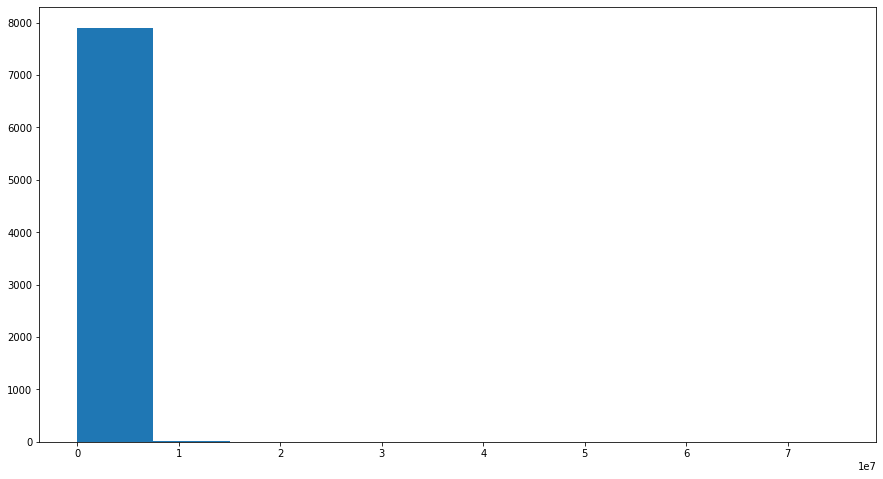

In [ ]:
plt.figure(figsize = (15,8))
ano_2011['capital_social_empresa'].hist(grid = False)

### 3.1.4 Empresas que fecharam em 2011:

In [ ]:
# Selecionando as empresas que fecharam em 2011, independente de quando abriram:

df_fecharam_2011 = df_cnpjs[(df_cnpjs['anoFechamento'] == 2011)]

df_fecharam_2011.anoFechamento.value_counts()

2011    5348
Name: anoFechamento, dtype: int64

In [ ]:
# Quantidade de empresas que fecharam em 2011: 

empresas_fecharam = pd.pivot_table (
    df_fecharam_2011, 
    index = 'porte_empresa_descr',
    values = 'cnpj',
    aggfunc = 'count'
).reset_index().rename(columns={'porte_empresa_descr':'Porte da Empresa', 'cnpj':'Quantidade de Empresas'})

empresas_fecharam.sort_values(by = 'Quantidade de Empresas', ignore_index = True)

,Porte da Empresa,Quantidade de Empresas
0,NAO INFORMADO,44
1,EMPRESA DE PEQUENO PORTE,225
2,DEMAIS,893
3,MICRO EMPRESA,4186


Em 2011, o tipo de empresa que mais fechou foi Micro Empresa. Vale lembrar que o tipo de empresa que mais abriu neste ano, então trata-se de um comportamento esperado. 

In [ ]:
# Verificando o tipo de empresa que fechou por região e por porte:

empresas_fecharam_regiao = pd.pivot_table (
    df_fecharam_2011, 
    index = 'regiao',
    columns = 'porte_empresa_descr',
    values = 'cnpj',
    aggfunc = 'count'
).reset_index().rename(columns = {'regiao':'Região'})

empresas_fecharam_regiao

porte_empresa_descr,Região,DEMAIS,EMPRESA DE PEQUENO PORTE,MICRO EMPRESA
0,Centro-Oeste,60,17,384
1,Nordeste,101,33,824
2,Norte,39,9,191
3,Sudeste,536,123,2023
4,Sul,155,43,764


É possível perceber que, em todas as regiões, o tipo de empresa que mais fechou em 2011 foi o tipo de Micro Empresa. 

In [ ]:
# Verificando o total de empresas que fecharam em 2011:

empresas_fecharam_regiao = pd.pivot_table (
    df_fecharam_2011, 
    index = 'regiao',
    values = 'cnpj',
    aggfunc = 'count'
).reset_index().rename(columns = {'regiao':'Região', 'cnpj':'Quantidade de Empresas'})

empresas_fecharam_regiao

,Região,Quantidade de Empresas
0,Centro-Oeste,461
1,Nordeste,958
2,Norte,239
3,Sudeste,2682
4,Sul,962


A região sudeste foi a que apresentou a maior abertura de empresas em 2011, portanto foi a que mais fechou também. 

In [ ]:
# Verificando o tipo de atividade que mais fechou em 2011:

atividade_fechou = pd.pivot_table(
    df_fecharam_2011,
    columns = 'regiao', 
    index = 'nm_secao',
    values = 'cnpj',
    aggfunc = 'count'
).reset_index().rename(columns={'nm_secao':'Tipo de Atividade'})

atividade_fechou

regiao,Tipo de Atividade,Centro-Oeste,Nordeste,Norte,Sudeste,Sul
0,ADMINISTRAÇÃO PÚBLICA DEFESA E SEGURIDADE SOCIAL,2.0,3.0,1.0,NaN,NaN
1,AGRICULTURA PECUÁRIA PRODUÇÃO FLORESTAL PESCA ...,2.0,4.0,3.0,196.0,5.0
2,ALOJAMENTO E ALIMENTAÇÃO,32.0,101.0,16.0,223.0,87.0
3,ARTES CULTURA ESPORTE E RECREAÇÃO,6.0,5.0,1.0,34.0,14.0
4,ATIVIDADES ADMINISTRATIVAS E SERVIÇOS COMPLEME...,25.0,45.0,13.0,177.0,64.0
5,ATIVIDADES FINANCEIRAS DE SEGUROS E SERVIÇOS R...,2.0,5.0,1.0,41.0,22.0
6,ATIVIDADES IMOBILIÁRIAS,NaN,7.0,2.0,30.0,11.0
7,ATIVIDADES PROFISSIONAIS CIENTÍFICAS E TÉCNICAS,20.0,31.0,10.0,134.0,37.0
8,COMÉRCIO REPARAÇÃO DE VEÍCULOS AUTOMOTORES E M...,203.0,428.0,117.0,902.0,348.0
9,CONSTRUÇÃO,34.0,51.0,13.0,140.0,71.0


Conforme esperado, o tipo de empresa que mais fechou em 2011 foi Comércio Reparação de Veículos Automotores e Motocicletas, em todas as regiões. 

Em segundo lugar, no Nordeste, foi alojamento e alimentação; no Norte foi outras atividades de serviços; e no Sudeste e no Sul foi de indústrias de transformação. 

### 3.2 Análise do Ano de 2016:

In [ ]:
# Verificando quantas empresas abriram no ano de 2016 (independente do ano de fechamento):

ano_2016 = df_cnpjs[(df_cnpjs['anoAbertura'] == 2016)]

ano_2016.groupby('anoAbertura').cnpj.count()

anoAbertura
2016    13057
Name: cnpj, dtype: int64

13.057 empresas abriram em 2016.

In [ ]:
# Quantidade de empresas que abriram em 2016 por estado: 

empresa_uf_2016 = (
    ano_2016.groupby('uf').cnpj.count().sort_values(ascending = True).reset_index()
    .rename(columns={'uf':'Estado','cnpj':'Quantidade de Empresas'})
)

empresa_uf_2016

,Estado,Quantidade de Empresas
0,EX,25
1,AC,29
2,AP,29
3,RR,32
4,SE,96
5,RO,96
6,TO,102
7,AM,119
8,PI,121
9,AL,137


Os estados que mais abriram empresas em 2016 foram: Rio Grande do Sul, Paraná, Rio de Janeiro, Minas Gerais e São Paulo. 

Text(0, 0.5, 'Quantidade de Empresas')

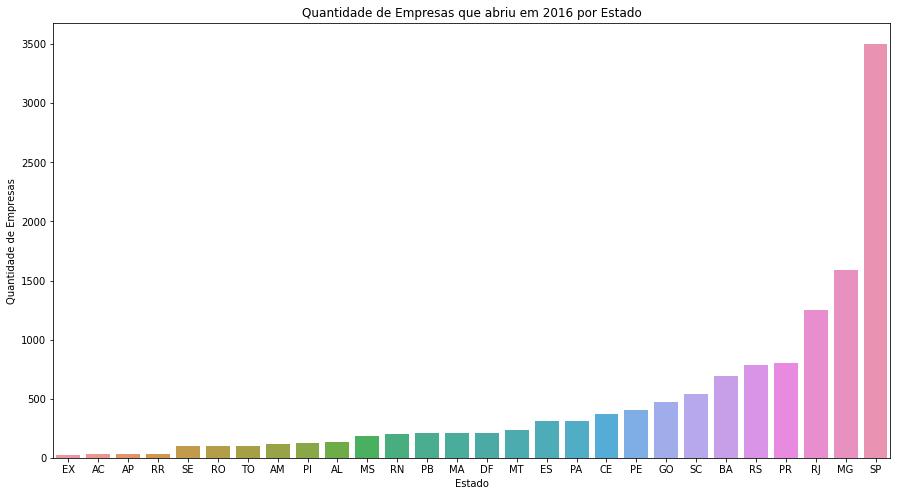

In [ ]:
# Visualização da quantidade de empresas que abriu em 2016 por estado: 

plt.figure(figsize = (15,8))
plt.title("Quantidade de Empresas que abriu em 2016 por Estado")
sns.barplot(x = empresa_uf_2016.Estado, y = empresa_uf_2016['Quantidade de Empresas'])
plt.ylabel('Quantidade de Empresas')

In [ ]:
# Verificando quantas empresas abriram em 2016 e ainda estão ativas:

ano_2016_ativas = df_cnpjs[(df_cnpjs['anoAbertura'] == 2016) & (df_cnpjs['situacao_atividade'] == 'ATIVA')]

ano_2016_ativas.groupby('anoAbertura').cnpj.count()

anoAbertura
2016    7617
Name: cnpj, dtype: int64

A quantidade de empresas que abriu em 2016 e que ainda estão ativas é de 7.617, ou seja, em 2016 foram abertas 13.057 empresas e destas, 7.617 ainda estão ativas.

In [ ]:
# Verificando o tipo de atividade das empresas que abriram em 2016:

tabela_categoricas(ano_2016, 'nm_secao', 'SEÇÃO')

,SEÇÃO,Qtd empresas,%Total
0,OUTRAS ATIVIDADES DE SERVIÇOS,3552,27.203799
1,COMÉRCIO REPARAÇÃO DE VEÍCULOS AUTOMOTORES E M...,3265,25.005744
2,ALOJAMENTO E ALIMENTAÇÃO,1113,8.524163
3,INDÚSTRIAS DE TRANSFORMAÇÃO,1025,7.850195
4,CONSTRUÇÃO,893,6.839243
5,ATIVIDADES PROFISSIONAIS CIENTÍFICAS E TÉCNICAS,655,5.016466
6,ATIVIDADES ADMINISTRATIVAS E SERVIÇOS COMPLEME...,601,4.602895
7,TRANSPORTE ARMAZENAGEM E CORREIO,562,4.304205
8,EDUCAÇÃO,327,2.504404
9,INFORMAÇÃO E COMUNICAÇÃO,209,1.600674


É interessante notar que, diferente de 2011, o tipo de empresa que mais abriu em 2016 foi de Outras Atividades de Serviços, com 27%, e em segundo lugar ficaram as empresas do tipo Comércio Reparação de Veículos Automotores e Motocicletas, com 25%. 


In [ ]:
# Verificando as atividades das empresas que abriram em 2016 e ainda estão ativas: 

tabela_categoricas(ano_2016_ativas, 'nm_secao', 'SEÇÃO')

,SEÇÃO,Qtd empresas,%Total
0,COMÉRCIO REPARAÇÃO DE VEÍCULOS AUTOMOTORES E M...,2256,29.617960
1,OUTRAS ATIVIDADES DE SERVIÇOS,835,10.962321
2,ALOJAMENTO E ALIMENTAÇÃO,785,10.305895
3,INDÚSTRIAS DE TRANSFORMAÇÃO,729,9.570697
4,CONSTRUÇÃO,677,8.888014
5,ATIVIDADES PROFISSIONAIS CIENTÍFICAS E TÉCNICAS,451,5.920966
6,ATIVIDADES ADMINISTRATIVAS E SERVIÇOS COMPLEME...,433,5.684653
7,TRANSPORTE ARMAZENAGEM E CORREIO,407,5.343311
8,EDUCAÇÃO,222,2.914533
9,SAÚDE HUMANA E SERVIÇOS SOCIAIS,155,2.034922


Apesar de as empresas de serviços terem sido as que mais abriram em 2016, as que mais se mantiveram ativas foram as do tipo Comércio Reparação de Veículos Automotores e Motocicletas, com 29% das empresas que ainda se mantêm ativas.

In [ ]:
# Verificando a distribuição dessas empresas que abriram em 2016 por Região: 

empresa_regiao = pd.pivot_table(
    ano_2016,
    columns = 'regiao',
    index = 'nm_secao',
    values = 'cnpj',
    aggfunc = 'count'
)

empresa_regiao

regiao,Centro-Oeste,Nordeste,Norte,Sudeste,Sul
nm_secao,,,,,
ADMINISTRAÇÃO PÚBLICA DEFESA E SEGURIDADE SOCIAL,1.0,1.0,NaN,NaN,NaN
AGRICULTURA PECUÁRIA PRODUÇÃO FLORESTAL PESCA E AQUICULTURA,8.0,8.0,1.0,144.0,6.0
ALOJAMENTO E ALIMENTAÇÃO,111.0,185.0,56.0,615.0,146.0
ARTES CULTURA ESPORTE E RECREAÇÃO,11.0,18.0,3.0,86.0,31.0
ATIVIDADES ADMINISTRATIVAS E SERVIÇOS COMPLEMENTARES,47.0,75.0,22.0,360.0,97.0
ATIVIDADES FINANCEIRAS DE SEGUROS E SERVIÇOS RELACIONADOS,5.0,8.0,2.0,58.0,16.0
ATIVIDADES IMOBILIÁRIAS,8.0,11.0,2.0,37.0,14.0
ATIVIDADES PROFISSIONAIS CIENTÍFICAS E TÉCNICAS,64.0,95.0,24.0,365.0,107.0
COMÉRCIO REPARAÇÃO DE VEÍCULOS AUTOMOTORES E MOTOCICLETAS,311.0,704.0,207.0,1501.0,541.0


Na região do Centro Oeste, o tipo de empresa que mais abriu foi de Comércio Reparação de Veículos Automotores e Motocicletas. 

Nas demais regiões - Nordeste, Norte, Sudeste e Sul - o tipo de empresa que mais abriu foram empresas de serviços. 

In [ ]:
# Verificando a distribuição das empresas que abriram em 2016 e continuam ativas por Região: 

empresa_regiao_ativa_2016 = pd.pivot_table(
    ano_2016_ativas,
    columns = 'regiao',
    index = 'nm_secao',
    values = 'cnpj',
    aggfunc = 'count'
)

empresa_regiao_ativa_2016

regiao,Centro-Oeste,Nordeste,Norte,Sudeste,Sul
nm_secao,,,,,
ADMINISTRAÇÃO PÚBLICA DEFESA E SEGURIDADE SOCIAL,1.0,1.0,NaN,NaN,NaN
AGRICULTURA PECUÁRIA PRODUÇÃO FLORESTAL PESCA E AQUICULTURA,7.0,8.0,1.0,124.0,3.0
ALOJAMENTO E ALIMENTAÇÃO,78.0,128.0,41.0,437.0,101.0
ARTES CULTURA ESPORTE E RECREAÇÃO,8.0,14.0,2.0,59.0,21.0
ATIVIDADES ADMINISTRATIVAS E SERVIÇOS COMPLEMENTARES,37.0,58.0,17.0,249.0,72.0
ATIVIDADES FINANCEIRAS DE SEGUROS E SERVIÇOS RELACIONADOS,4.0,7.0,2.0,54.0,14.0
ATIVIDADES IMOBILIÁRIAS,8.0,10.0,2.0,34.0,12.0
ATIVIDADES PROFISSIONAIS CIENTÍFICAS E TÉCNICAS,37.0,65.0,19.0,252.0,78.0
COMÉRCIO REPARAÇÃO DE VEÍCULOS AUTOMOTORES E MOTOCICLETAS,214.0,492.0,139.0,1036.0,374.0


Vimos anteriormente que apesar de as empresas de serviço terem sido as que mais abriram em 2016, as que mais se mantiveram ativas são as do tipo Comércio e Reparação de Veículos Automotores e Motocicletas. 

Dessa forma, o tipo de empresa que mais abriu em todas as regiões e ainda se mantém ativas em todas as regiões é a de Comércio Reparação de Veículos Automores e Motocicletas. 

Por outro lado, nas regiões Centro Oeste, Nordeste e Sudeste, esse tipo de empresa - de serviços - fica em segundo lugar das que abriram em 2016 e ainda estão ativas. 

In [ ]:
# Verificando o porte das empresas que abriram em 2016: 

porte_2016 = pd.pivot_table(
    ano_2016, 
    index = 'porte_empresa_descr',
    values = 'cnpj',
    aggfunc = 'count'
).reset_index().rename(columns={'cnpj':'Quantidade','porte_empresa_descr':'Porte da Empresa'})

porte_2016.sort_values(by = 'Quantidade', ascending = True, ignore_index = True)

,Porte da Empresa,Quantidade
0,NAO INFORMADO,23
1,EMPRESA DE PEQUENO PORTE,281
2,DEMAIS,3173
3,MICRO EMPRESA,9580


Assim como em 2011, o porte de empresa que mais abriu em 2016 foi do tipo Micro Empresa. 

In [ ]:
# Verificando a quantidade das empresas que abriram em 2016 pelo porte e por estado:

porte_uf_2016 = pd.pivot_table(
    ano_2016, 
    index = 'uf',
    columns = 'porte_empresa_descr', 
    values = 'cnpj',
    aggfunc = 'count'
).reset_index().rename(columns = {'uf':'Estado'})

porte_uf_2016

porte_empresa_descr,Estado,DEMAIS,EMPRESA DE PEQUENO PORTE,MICRO EMPRESA,NAO INFORMADO
0,AC,13.0,NaN,16.0,NaN
1,AL,40.0,2.0,95.0,NaN
2,AM,41.0,5.0,73.0,NaN
3,AP,9.0,1.0,19.0,NaN
4,BA,210.0,9.0,472.0,NaN
5,CE,97.0,3.0,270.0,NaN
6,DF,9.0,7.0,198.0,NaN
7,ES,55.0,3.0,250.0,NaN
8,EX,2.0,NaN,NaN,23.0
9,GO,112.0,9.0,349.0,NaN


Em todos os 27 estados brasileiros, o tipo de empresa que mais abriu em 2016 foi o tipo Micro Empresa. 

In [ ]:
# Verificando o porte das empresas que abriram em 2016 e que continuam ativas: 

porte_2016_ativas = pd.pivot_table(
    ano_2016_ativas, 
    index = 'porte_empresa_descr',
    values = 'cnpj',
    aggfunc = 'count'
).reset_index().rename(columns = {'porte_empresa_descr':'Porte da Empresa', 'cnpj':'Quantidade'})

porte_2016_ativas.sort_values(by = 'Quantidade', ascending = True, ignore_index = True)

,Porte da Empresa,Quantidade
0,NAO INFORMADO,17
1,EMPRESA DE PEQUENO PORTE,225
2,DEMAIS,599
3,MICRO EMPRESA,6776


O tipo de empresa que mais abriu em 2016 e ainda continua ativa também é Micro Empresa. 

In [ ]:
# Verificando a quantidade das empresas que abriram em 2016 e continuam ativas pelo porte:

porte_ativas_2016 = pd.pivot_table(
    ano_2016_ativas, 
    index = 'uf',
    columns = 'porte_empresa_descr', 
    values = 'cnpj',
    aggfunc = 'count'
).reset_index().rename(columns = {'uf':'Estado'})

porte_ativas_2016

porte_empresa_descr,Estado,DEMAIS,EMPRESA DE PEQUENO PORTE,MICRO EMPRESA,NAO INFORMADO
0,AC,1.0,NaN,14.0,NaN
1,AL,3.0,1.0,75.0,NaN
2,AM,2.0,4.0,53.0,NaN
3,AP,2.0,1.0,15.0,NaN
4,BA,26.0,7.0,347.0,NaN
5,CE,10.0,3.0,200.0,NaN
6,DF,7.0,4.0,142.0,NaN
7,ES,7.0,3.0,172.0,NaN
8,EX,2.0,NaN,NaN,17.0
9,GO,16.0,9.0,246.0,NaN


Também, em todos os estados, a quantidade de empresas que mais abriu em 2016 e ainda se mantém ativa é do tipo Micro Empresa.

### 3.2.1 Empresas que fecharam em 2016:

In [ ]:
# Selecionando as empresas que fecharam em 2016, independente de quando abriram:

df_fecharam_2016 = df_cnpjs[(df_cnpjs['anoFechamento'] == 2016)]

df_fecharam_2016.anoFechamento.value_counts()

2016    14743
Name: anoFechamento, dtype: int64

* Em 2011, 7.915 empresas abriram e 5.348 fecharam.

* Em 2016, 13.057 empresas abriram e 14.743 fecharam. 

In [ ]:
# Quantidade de empresas que fecharam em 2016: 

empresas_fecharam_2016 = pd.pivot_table (
    df_fecharam_2016, 
    index = 'porte_empresa_descr',
    values = 'cnpj',
    aggfunc = 'count'
).reset_index().rename(columns={'porte_empresa_descr':'Porte da Empresa', 'cnpj':'Quantidade de Empresas'})

empresas_fecharam_2016.sort_values(by = 'Quantidade de Empresas', ignore_index = True)

,Porte da Empresa,Quantidade de Empresas
0,NAO INFORMADO,18
1,EMPRESA DE PEQUENO PORTE,341
2,DEMAIS,3422
3,MICRO EMPRESA,10962


Das 14.743 empresas que fecharam em 2016, 10.962 eram do tipo Micro Empresa. 

In [ ]:
# Verificando o tipo de empresa que fechou por região e por porte:

empresas_fecharam_regiao_2016 = pd.pivot_table (
    df_fecharam_2016, 
    index = 'regiao',
    columns = 'porte_empresa_descr',
    values = 'cnpj',
    aggfunc = 'count'
).reset_index().rename(columns = {'regiao':'Região'})

empresas_fecharam_regiao_2016

porte_empresa_descr,Região,DEMAIS,EMPRESA DE PEQUENO PORTE,MICRO EMPRESA
0,Centro-Oeste,233,29,989
1,Nordeste,791,47,1887
2,Norte,263,23,479
3,Sudeste,1604,184,5713
4,Sul,527,58,1894


Em todas as regiões brasileiras, o tipo de empresa que mais fechou em 2016 foram as Micro Empresas.

In [ ]:
# Verificando o total de empresas que fecharam em 2016:

empresas_fecharam_regiao_2016 = pd.pivot_table (
    df_fecharam_2016, 
    index = 'regiao',
    values = 'cnpj',
    aggfunc = 'count'
).reset_index().rename(columns = {'regiao':'Região', 'cnpj':'Quantidade de Empresas'})

empresas_fecharam_regiao_2016.sort_values(by = 'Quantidade de Empresas', ignore_index = True)

,Região,Quantidade de Empresas
0,Norte,765
1,Centro-Oeste,1251
2,Sul,2479
3,Nordeste,2725
4,Sudeste,7501


A região que mais teve empresas que fecharam em 2016 foi a região Sudeste. 

In [ ]:
# Verificando o tipo de atividade que mais fechou em 2016:

atividade_fechou_2016 = pd.pivot_table(
    df_fecharam_2016,
    columns = 'regiao', 
    index = 'nm_secao',
    values = 'cnpj',
    aggfunc = 'count'
).reset_index().rename(columns={'nm_secao':'Tipo de Atividade'})

atividade_fechou_2016

regiao,Tipo de Atividade,Centro-Oeste,Nordeste,Norte,Sudeste,Sul
0,ADMINISTRAÇÃO PÚBLICA DEFESA E SEGURIDADE SOCIAL,1.0,1.0,1.0,NaN,1.0
1,AGRICULTURA PECUÁRIA PRODUÇÃO FLORESTAL PESCA ...,9.0,8.0,3.0,194.0,6.0
2,ALOJAMENTO E ALIMENTAÇÃO,117.0,210.0,61.0,686.0,189.0
3,ARTES CULTURA ESPORTE E RECREAÇÃO,11.0,24.0,2.0,90.0,36.0
4,ATIVIDADES ADMINISTRATIVAS E SERVIÇOS COMPLEME...,54.0,91.0,29.0,427.0,109.0
5,ATIVIDADES FINANCEIRAS DE SEGUROS E SERVIÇOS R...,9.0,10.0,2.0,82.0,19.0
6,ATIVIDADES IMOBILIÁRIAS,9.0,13.0,2.0,43.0,16.0
7,ATIVIDADES PROFISSIONAIS CIENTÍFICAS E TÉCNICAS,64.0,104.0,25.0,389.0,114.0
8,COMÉRCIO REPARAÇÃO DE VEÍCULOS AUTOMOTORES E M...,390.0,890.0,226.0,1917.0,706.0
9,CONSTRUÇÃO,83.0,114.0,29.0,512.0,216.0


Com exceção da região Norte, o tipo de atividade das empresas que mais fecharam em 2016 foi de Comércio Reparação de Veículos Automotores e Motocicletas. 

### 4. Empresas que abriram em 2011 e fecharam em 2016:

In [ ]:
# Separando as empresas que abriram em 2011 e que fecharam em 2016:

empresas_2011_2016 = ano_2011[(ano_2011['anoFechamento'] == 2016)]

In [ ]:
empresas_2011_2016.anoAbertura.value_counts()

2011    263
Name: anoAbertura, dtype: int64

In [ ]:
empresas_2011_2016.anoFechamento.value_counts()

2016    263
Name: anoFechamento, dtype: int64

Das empresas que abriram em 2011, apenas 263 fecharam em 2016. 

**Importante lembrar que a base que está sendo utilizada neste trabalho corresponde a apenas 5% da base completa.**

In [ ]:
# Verificando o porte destas empresas: 

empresas_finais = pd.pivot_table (
    empresas_2011_2016, 
    index = 'porte_empresa_descr',
    values = 'cnpj',
    aggfunc = 'count'
).reset_index().rename(columns={'porte_empresa_descr':'Porte da Empresa', 'cnpj':'Quantidade de Empresas'})

empresas_finais.sort_values(by = 'Quantidade de Empresas', ignore_index = True)

,Porte da Empresa,Quantidade de Empresas
0,EMPRESA DE PEQUENO PORTE,12
1,DEMAIS,32
2,MICRO EMPRESA,219


Das 263 empresas, 219 correspondem ao tipo de empresa: Micro Empresa. 

In [ ]:
# Verificando o tipo de empresa que fechou por região e por porte:

empresas_fecharam_regiao_finais = pd.pivot_table (
    empresas_2011_2016, 
    index = 'regiao',
    columns = 'porte_empresa_descr',
    values = 'cnpj',
    aggfunc = 'count'
).reset_index().rename(columns = {'regiao':'Região'})

empresas_fecharam_regiao_finais

porte_empresa_descr,Região,DEMAIS,EMPRESA DE PEQUENO PORTE,MICRO EMPRESA
0,Centro-Oeste,1.0,NaN,19.0
1,Nordeste,1.0,3.0,42.0
2,Norte,1.0,NaN,13.0
3,Sudeste,21.0,7.0,113.0
4,Sul,8.0,2.0,32.0


Conforme esperado, em todas as regiões o tipo de empresa que mais fechou foi o tipo Micro Empresa, sendo que a região onde mais empresas fecharam foi a região Sudeste.

In [ ]:
# Verificando o total de empresas que abriu em 2011 e fechou em 2016:

empresas_fecharam_regiao_finais = pd.pivot_table (
    empresas_2011_2016, 
    index = 'regiao',
    values = 'cnpj',
    aggfunc = 'count'
).reset_index().rename(columns = {'regiao':'Região', 'cnpj':'Quantidade de Empresas'})

empresas_fecharam_regiao_finais.sort_values(by = 'Quantidade de Empresas', ignore_index = True)

,Região,Quantidade de Empresas
0,Norte,14
1,Centro-Oeste,20
2,Sul,42
3,Nordeste,46
4,Sudeste,141


A região que mais teve empresas que abriram em 2011 e fecharam em 2016 foi a região Sudeste. 

In [ ]:
# Verificando o tipo de atividade que abriu em 2011 e mais fechou em 2016:

atividade_fechou_finais = pd.pivot_table(
    empresas_2011_2016,
    columns = 'regiao', 
    index = 'nm_secao',
    values = 'cnpj',
    aggfunc = 'count'
).reset_index().rename(columns={'nm_secao':'Tipo de Atividade'})

atividade_fechou_finais

regiao,Tipo de Atividade,Centro-Oeste,Nordeste,Norte,Sudeste,Sul
0,AGRICULTURA PECUÁRIA PRODUÇÃO FLORESTAL PESCA ...,NaN,NaN,NaN,5.0,NaN
1,ALOJAMENTO E ALIMENTAÇÃO,3.0,5.0,2.0,12.0,3.0
2,ARTES CULTURA ESPORTE E RECREAÇÃO,NaN,1.0,NaN,NaN,1.0
3,ATIVIDADES ADMINISTRATIVAS E SERVIÇOS COMPLEME...,2.0,1.0,1.0,5.0,1.0
4,ATIVIDADES FINANCEIRAS DE SEGUROS E SERVIÇOS R...,1.0,NaN,NaN,1.0,1.0
5,ATIVIDADES IMOBILIÁRIAS,NaN,1.0,NaN,2.0,NaN
6,ATIVIDADES PROFISSIONAIS CIENTÍFICAS E TÉCNICAS,1.0,NaN,NaN,8.0,4.0
7,COMÉRCIO REPARAÇÃO DE VEÍCULOS AUTOMOTORES E M...,9.0,23.0,7.0,49.0,12.0
8,CONSTRUÇÃO,NaN,1.0,NaN,11.0,2.0
9,EDUCAÇÃO,1.0,1.0,1.0,4.0,NaN


O tipo de atividade que abriu em 2011 e mais fechou em todas as regiões foi o Comércio Reparação de Veículos Automotores e Motocicletas. 

In [ ]:
# Filtrando os dois anos:

filtro = df_cnpjs[(df_cnpjs['anoFechamento'] == 2011)|(df_cnpjs['anoFechamento'] == 2016)]

In [ ]:
# Agrupando pelas quantidades:

agrupando = filtro.groupby('anoFechamento').cnpj.count().reset_index().rename(columns={'anoFechamento':'Ano de Fechamento das Empresas', 'cnpj':'Quantidade de Empresas'})

agrupando

,Ano de Fechamento das Empresas,Quantidade de Empresas
0,2011,5348
1,2016,14743


Text(0, 0.5, 'Quantidade de Empresas')

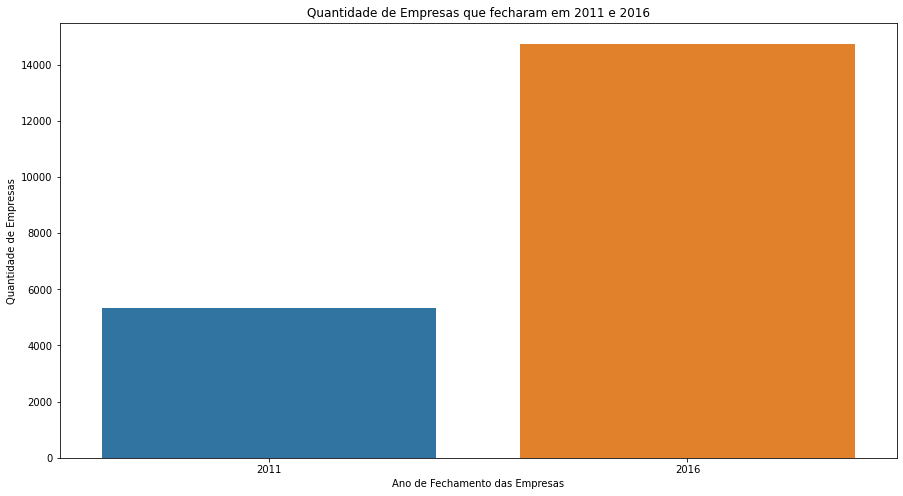

In [ ]:
# Visualização da quantidade de empresas que abriu em 2016 por estado: 

plt.figure(figsize = (15,8))
plt.title("Quantidade de Empresas que fecharam em 2011 e 2016")
sns.barplot(x = agrupando['Ano de Fechamento das Empresas'], y = agrupando['Quantidade de Empresas'])
plt.ylabel('Quantidade de Empresas')

Por meio do gráfico é possível perceber que em 2016 muito mais empresas fecharam que em 2011.

# **Conclusões:** 

* Nesta análise, utilizou-se apenas 5% dos dados da base completa de CNPJ. 

* Foi feito um filtro para analisar apenas as empresas que estavam ativas e as que estavam com status de baixada - neste caso, inativas. Primeiramente, fez-se uma análise exploratória dos dados sem antes filtrar pelo ano de 2011 e 2016. Então tem-se que 51% da base é composta por empresas que estão ativas e 48% por empresas que estão inativas. Dentre as empresas que estão ativas, sem filtrar por ano, 31% têm como atividade Comércio Reparação de Veículos Automotores e Motocicletas. Ainda, 80% das empresas ativas são tipo Micro Empresa.  

* O ano em que mais empresas abriram foi o ano de 2019 e o ano que mais empresas fecharam foi o ano de 2008. O tipo de atividade das empresas que mais fecharam em 2020 é Comércio Reparação de Veículos Automotores e Motocicletas e o estado que mais fechou empresas foi o estado de São Paulo. 

* 7.915 empresas abriram em 2011 e 5.348 fecharam em 2011.
  * Destas 7.915, 4.202 ainda estão ativas;
  * Estado que mais abriu empresas foi São Paulo; 
  * Micro Empresas foram as que mais abriram e continuaram ativas; 
  * 33% têm como tipo de atividade Comércio Reparação de Veículos Automotores e Motocicletas;
  * Além disso, Micro Empresas foi o tipo de empresa que mais fechou em todas as regiões;
  * Região Sudeste foi a região que mais abriu e fechou empresas. 

* 13.057 empresas abriram em 2016 e 14.743 fecharam no mesmo ano, ou seja, em 2016, o número de empresas que fechou foi maior que o número de empresas que abriu - importante lembrar que estamos trabalhando com apenas 5% da base. 
  * Dentre as 13.057 empresas que abriram, 7.617 ainda estão ativas; 
  * Diferente de 2011, o tipo de atividade de empresa que mais abriu em 2016 foi de empresas: Outras Atividades de Serviços, representando 27% das empresas;
  * Apesar de terem sido as que mais abriram, as empresas que mais se mantiveram ativas foram as de Comércio Recuperação de Veículos Automotores e Motocicletas;
  * Tipo de empresa que mais abriu foi Micro Empresa; 
  * Das 14.743 empresas que fecharam, 10.962 eram micro empresas. 

* Apenas 263 empresas que abriram em 2011 fecharam em 2016. 
  * Destas 263, 219 eram do tipo Micro Empresa; 
  * A região Sudeste foi a que mais fechou empresas; 
  * Maioria destas empresas tinham como tipo de atividade: Comércio Reparação de Veículos Automotores e Motocicletas. 


Finalmente, por meio desta análise exploratória, pôde-se perceber que o comportamento do tipo de atividade e do tipo de empresas que mais fechou e mais abriu em 2011 não foi tão diferente de 2016. Nos dois anos, mais abriram e fecharam empresas do tipo Micro Empresa; em 2011 o tipo de atividade destas empresas eram, em sua maioria, a de Comércio Reparação de Veículos Automotores e Motocicletas, mas em 2016, o tipo de atividade mais frequente era a de serviços. Além disso, a região que mais abriu e fechou empresas nos dois anos foi a região Sudeste. O fator que mais destaco nesta análise e fazendo uma conexão com o ano do impeachment da ex-presidente Dilma foi que, em 2016, mais empresas fecharam do que abriram. Esse fator, por si só, tem capacidade de demonstrar que a instabilidade política gerada pelo impeachment afetou o empresário, principalmente das Micro Empresas. Porém, não se pode afirmar que o impeachment foi a única causa deste comportamento das empresas, mas, talvez seja um dos fatores que tenha resultado neste comportamento. 
 

# **Referências Bibliográficas:**


DWECK, Esther; TEIXEIRA, Rodrigo Alves. A política fiscal do governo Dilma e a crise econômica. Texto Para Discussão, Campinas, v. 303, p. 1-42, jun. 2017. Disponível em: https://www.eco.unicamp.br/images/arquivos/artigos/3532/TD303.pdf. Acesso em: 13 set. 2020.

GLOBO. Como o impeachment pode afetar o seu negócio: entenda as perspectivas para a economia e o que esperar do novo governo. Entenda as perspectivas para a economia e o que esperar do novo governo. Disponível em: https://revistapegn.globo.com/Administracao-de-empresas/noticia/2016/05/como-o-impeachment-pode-afetar-o-seu-negocio.html. Acesso em: 13 set. 2020.